In [42]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering as AC


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scipy.cluster.hierarchy as sch

In [9]:
df1 = pd.read_csv('C:\\Users\\ChefAbi\\Downloads\\Country-data (1).csv')
df=df1.copy()

In [10]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [12]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

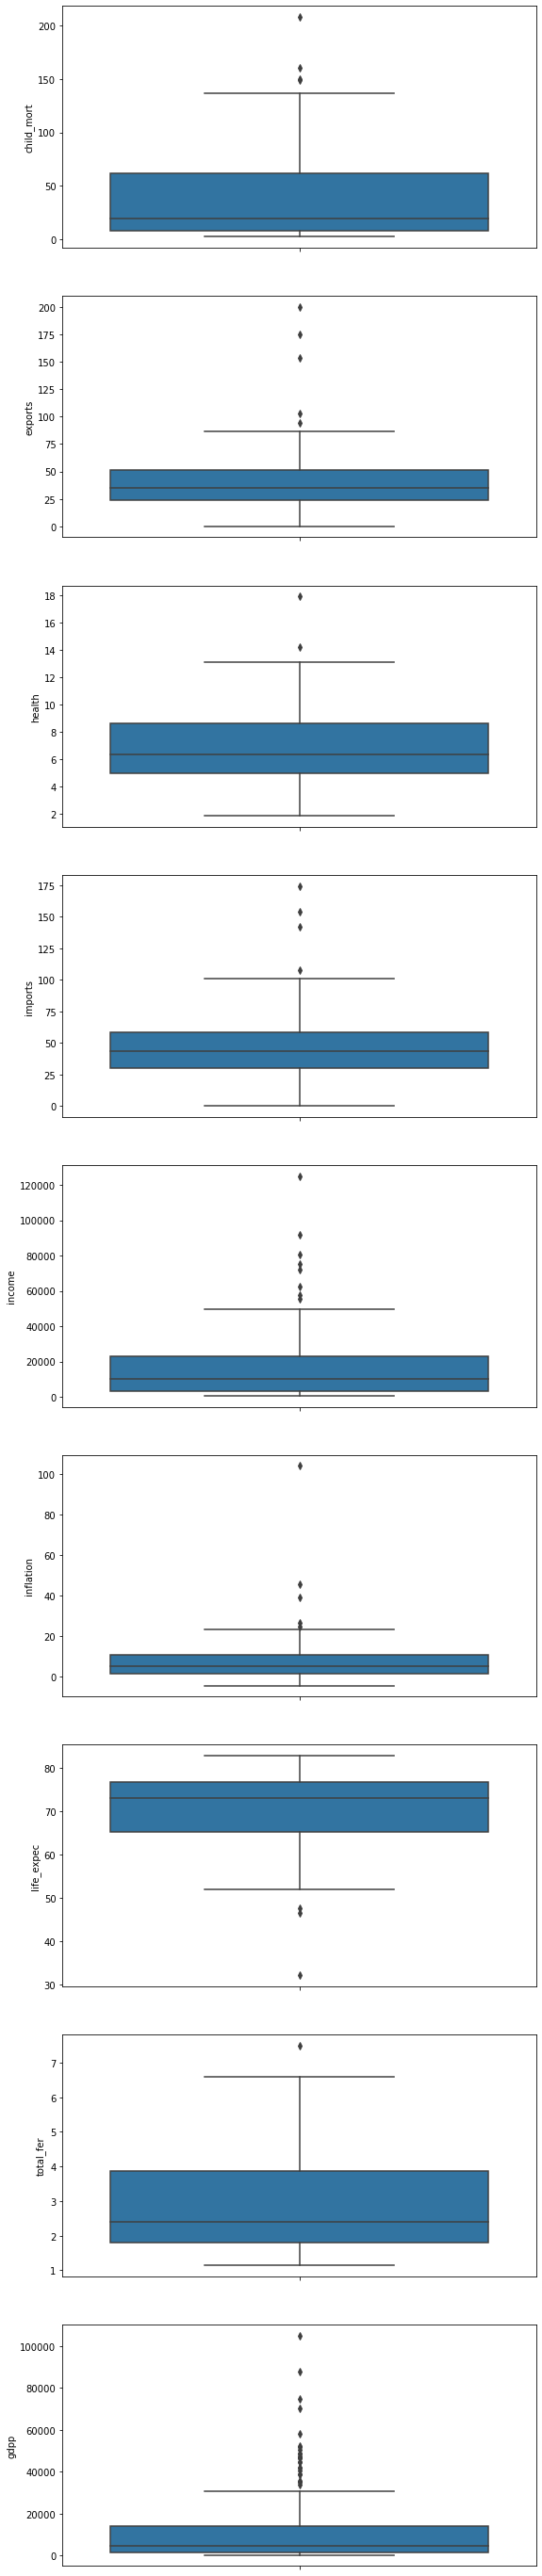

In [13]:
columns_name=df.drop('country',axis=1).columns
fig,axes=plt.subplots(nrows=len(columns_name),figsize=(9,50))
for i in range(len(columns_name)):
    sns.boxplot(ax=axes[i],y=columns_name[i],data=df)

In [14]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3=np.percentile(datacolumn,[25,75])
    IQR=Q3-Q1
    lower_range=Q1- (1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range
    

In [15]:
for col in df.drop('country',axis=1).columns:
    lowerbound,upperbound=outlier_treatment(df[col])
    df[col]=np.clip(df[col],a_min=lowerbound,a_max=upperbound)

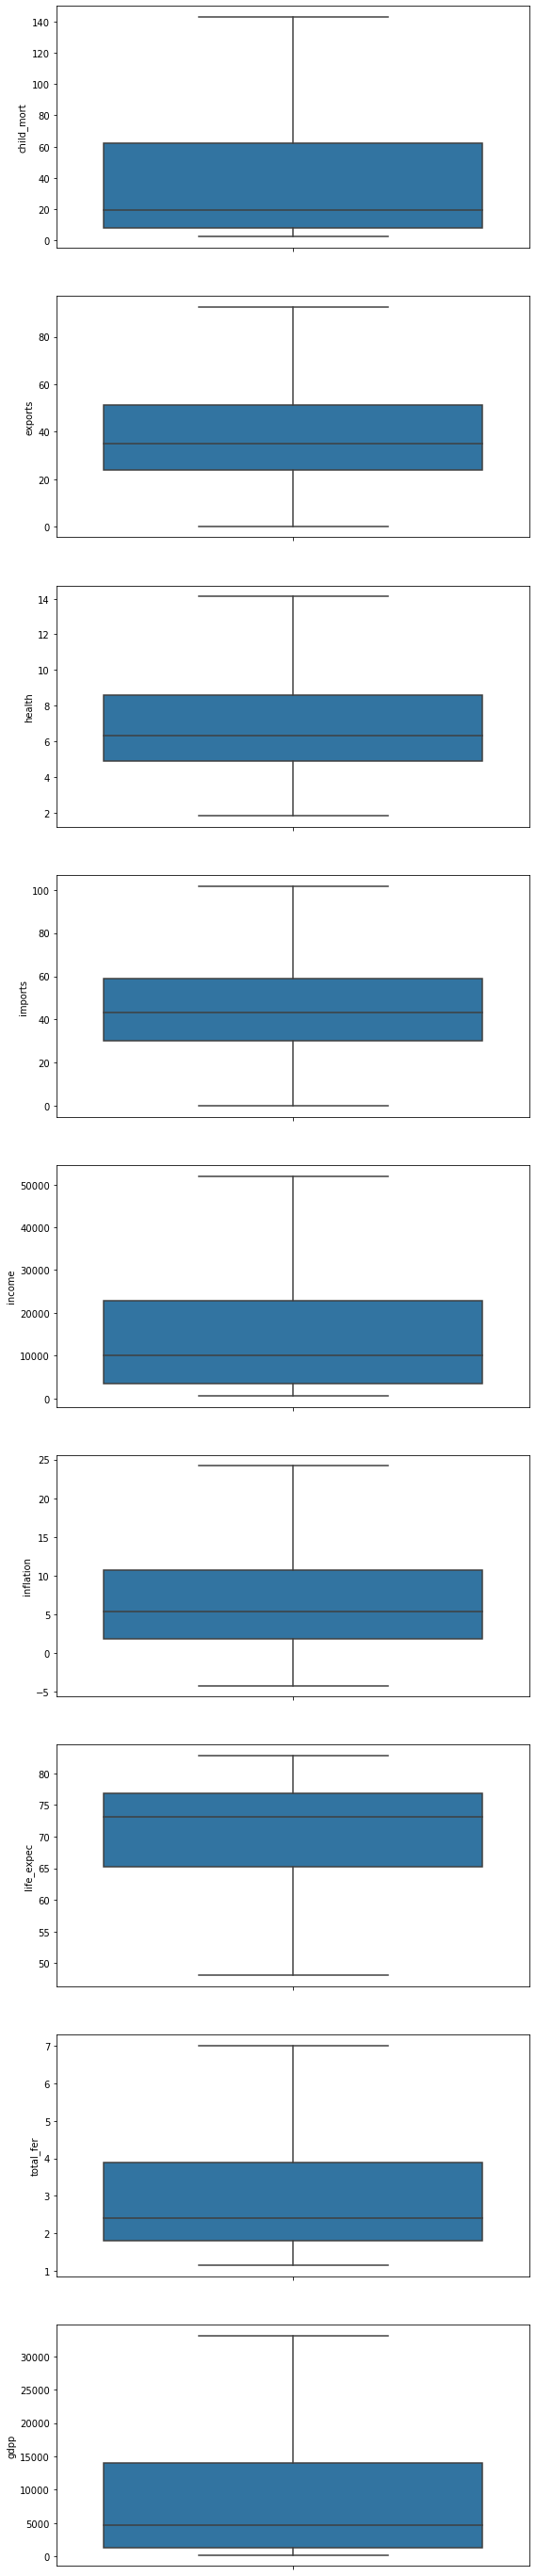

In [16]:
columns_name=df.drop('country',axis=1).columns
fig,axes=plt.subplots(nrows=len(columns_name),figsize=(9,50))
for i in range(len(columns_name)):
    sns.boxplot(ax=axes[i],y=columns_name[i],data=df)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,37.698204,38.443293,2.6000,8.250,19.30,62.10,142.8750
exports,167.0,39.543557,21.301318,0.1090,23.800,35.00,51.35,92.6750
health,167.0,6.792575,2.668103,1.8100,4.920,6.32,8.60,14.1200
imports,167.0,45.862071,20.338815,0.0659,30.200,43.30,58.75,101.5750
income,167.0,15921.574850,15207.197459,609.0000,3355.000,9960.00,22800.00,51967.5000
inflation,167.0,7.065066,6.704968,-4.2100,1.810,5.39,10.75,24.1600
life_expec,167.0,70.663772,8.522535,48.0500,65.300,73.10,76.80,82.8000
total_fer,167.0,2.945075,1.505564,1.1500,1.795,2.41,3.88,7.0075
gdpp,167.0,10351.281437,11612.044330,231.0000,1330.000,4660.00,14050.00,33130.0000


<AxesSubplot:>

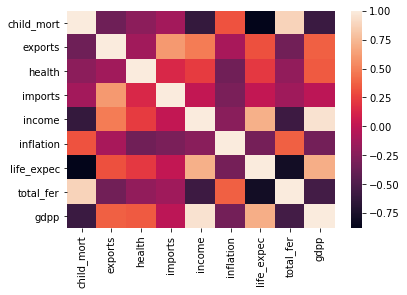

In [18]:
sns.heatmap(df.corr())

In [19]:
df.set_index('country',inplace=True)

In [20]:
from sklearn.preprocessing import RobustScaler
rc=RobustScaler().fit(df)
df_scaled=rc.transform(df)
df_scaled

array([[ 1.31662024, -0.90744102,  0.3423913 , ..., -1.46956522,
         1.63549161, -0.32287736],
       [-0.05013928, -0.25408348,  0.0625    , ...,  0.27826087,
        -0.36450839, -0.04481132],
       [ 0.14856082,  0.12341198, -0.58423913, ...,  0.29565217,
         0.23021583, -0.01572327],
       ...,
       [ 0.07428041,  1.3430127 ,  0.14130435, ...,  0.        ,
        -0.2206235 , -0.26336478],
       [ 0.68709378, -0.1814882 , -0.30978261, ..., -0.48695652,
         1.08393285, -0.26336478],
       [ 1.18477252,  0.07259528, -0.11684783, ..., -1.83478261,
         1.43405276, -0.25157233]])

### PCA

In [21]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df_scaled_pca=pca.fit_transform(df_scaled)
df_scaled_pca

array([[-2.35599001, -0.37005504],
       [ 0.14671397, -0.11321079],
       [-0.38546281, -0.28423578],
       [-2.31319715,  0.84034394],
       [ 0.87898283,  0.42385543],
       [-0.03683209, -1.49175073],
       [-0.32091104, -0.21533087],
       [ 2.230989  , -1.72953507],
       [ 2.76496725, -0.45864778],
       [-0.20169606, -0.19021746],
       [ 1.48484352, -0.50347604],
       [ 1.68101384,  0.56159607],
       [-1.07500622, -0.73038078],
       [ 0.99924594, -0.09543189],
       [ 0.22558541,  0.75926061],
       [ 2.8902538 ,  0.79801972],
       [ 0.05323451,  0.97629377],
       [-2.05954631, -0.01201804],
       [-0.35993173,  0.92309428],
       [-0.77574909,  0.02615376],
       [ 0.59225569, -0.24258019],
       [-0.70923692,  0.35544659],
       [ 0.15686462, -1.68448034],
       [ 2.09932628, -0.27393831],
       [ 0.64390913,  0.48305449],
       [-2.42518368, -0.45430947],
       [-2.35906241, -0.78334508],
       [-0.65345645,  1.0351861 ],
       [-2.13716277,

### KMEANS

In [22]:
from sklearn.cluster import KMeans
km_model=KMeans(n_clusters=3,random_state=42).fit(df_scaled_pca)
km_model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [23]:
km_model.cluster_centers_

array([[ 0.13210913,  0.25673052],
       [-1.83282542, -0.15602411],
       [ 2.35046875, -0.31078303]])

In [24]:
df_kmeans=df.copy()
df_kmeans['status']=km_model.labels_
df_kmeans.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,status
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,0


In [25]:
df_kmeans.reset_index(inplace=True)

In [26]:
df_kmeans.groupby('status')[['country']].sum()

,country
status,
0,AlbaniaAlgeriaAntigua and BarbudaArgentinaArme...
1,AfghanistanAngolaBangladeshBeninBurkina FasoBu...
2,AustraliaAustriaBahamasBahrainBelgiumBruneiCan...


In [60]:
replacevalues={0:'developing',1:'underdeveloping',2:'developed'}
final_df_kmeans=df_kmeans.replace({'status':replacevalues})
final_df_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,status
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,underdeveloping
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,developing
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,developing
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,underdeveloping
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,developing


In [61]:
final_df_kmeans.iloc[:,10].value_counts()

developing         77
underdeveloping    53
developed          37
Name: status, dtype: int64

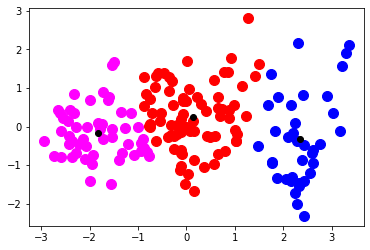

In [48]:
kmeans = KMeans( n_clusters = 3, init = 'k-means++')
y_kmeans2= kmeans.fit_predict(df_scaled_pca)


plt.scatter(df_scaled_pca[y_kmeans2==0,0],df_scaled_pca[y_kmeans2==0,1],s=100,c='magenta',label='Underdeveloping')
plt.scatter(df_scaled_pca[y_kmeans2==1,0],df_scaled_pca[y_kmeans2==1,1],s=100,c='red',label='Developing')
plt.scatter(df_scaled_pca[y_kmeans2==2,0],df_scaled_pca[y_kmeans2==2,1],s=100,c='blue',label='Developed')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "BLACK")
plt.show()

### Hierarchical

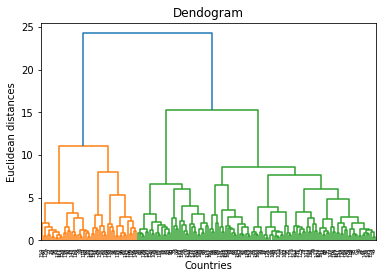

In [39]:
dendogram=sch.dendrogram(sch.linkage(df_scaled,method='ward')) 
plt.title('Dendogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()

In [45]:
hc=AC(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(df_scaled)

In [46]:
y_hc

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2], dtype=int64)

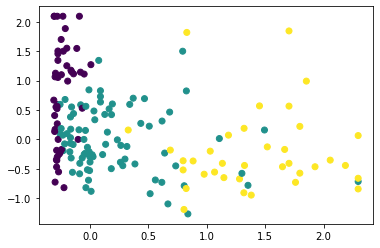

In [52]:
plt.scatter(df_scaled[:,0],df_scaled[:,1],c=y_hc)

In [53]:
df_hierachical=df.copy()
df_hierachical['status']=y_hc
df_hierachical

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,status
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,2
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,1
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,1
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970,1
Venezuela,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500,1
Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310,1


In [54]:
df_hierachical.reset_index(inplace=True)

In [55]:
df_hierachical.groupby('status')[['country']].sum()

,country
status,
0,AustraliaAustriaBahamasBahrainBelgiumBruneiCan...
1,AlbaniaAlgeriaAntigua and BarbudaArgentinaArme...
2,AfghanistanAngolaBeninBurkina FasoBurundiCamer...


In [62]:
replacevalues={0:'developing',1:'underdeveloping',2:'developed'}
final_df_hc=df_hierachical.replace({'status':replacevalues})
final_df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,status
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,developed
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,underdeveloping
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,underdeveloping
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,developed
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,underdeveloping


In [63]:
final_df_hc.iloc[:,10].value_counts()

underdeveloping    83
developing         48
developed          36
Name: status, dtype: int64